Execute the cell below before attempting to generate figures. To generate the corrected figures set <code>corrected = True</code> and to generate versions of the original figures set <code>corrected = False</code>.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

corrected = True

# Coefficients of consanguinity
if corrected:
    def Fff(s,N):
        return ((5*s**2 + 13*s +10)*N**2 - 2*(1-s)*N + 3*s**2 + s) /\
            ( 2*((s+3)*N + 3*s + 1)*N*((s+2)*N+s) )
            
    def Ffm(s,N):
        return s*(N-1)/(2*N*((s+2)*N+s))
else:
    def Fff(s,N):
        return ( 2*N*(5*N-1)-s*(N-1)*((N-1)*s**2*(1-s)+(3*N-1)*s + 7*N+1) ) /\
            ( 2*N*(2*N-s*(N-1)*(1+s))*(3*N+1-s*(N-1)*(s+2)) )
    
    def Ffm(s,N):
        return s*(N-1)*(1-s)/(2*N*(2*N-s*(N-1)*(1+s)))
    
def Fmm(N):
    return 1/(2*N)

# Coefficents of relatedness
def rbarff(s,N):
    return Fff(s,N) + Ffm(s,N)

def rbarfm(s,N):
    return Fmm(N) + Ffm(s,N)

# Figure 1

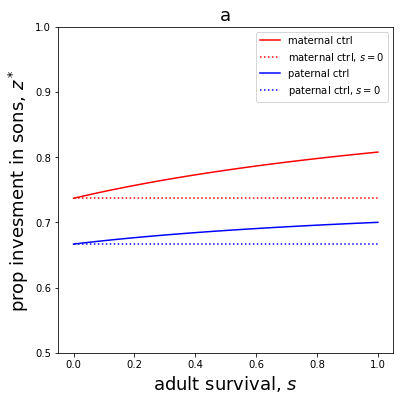

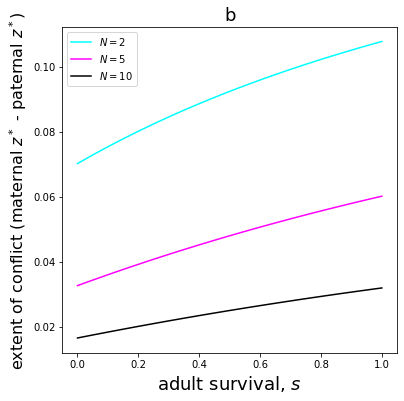

In [16]:
# Inclusive-fitness effects 

# solve eq 11 using iterative numerical procedure
def ILH(rbar, r=1/2, mu = 1, step=1e-01, tol=1e-06, maxiter=1000):
    z=0.5
    lhs = 1
    niter = 0
    while np.abs(lhs) > tol:
        # lhs of eq 11
        lhs = r * ( 1/z - 1/(1-z) ) + rbar*( 1/(1-z) + np.log(mu) )
        z += step * lhs
        niter += 1
        if niter > maxiter:
            break
    if niter > maxiter:
        return np.nan
    else:
        return z

# re-create Fig 2 in Wild 2006
nobs = 100
N = 2
svals = np.linspace(0,1,nobs)

# data series 1 (maternal ctrl)
series1 = np.array([])
for s in svals:
    z = ILH(rbar = rbarff(s,N))
    series1 = np.append(series1, z)

# data series 2 (paternal ctrl)
series2 = np.array([])
for s in svals:
    z = ILH(rbar = rbarfm(s,N))
    series2 = np.append(series2, z)
    
# data series 3 (maternal ctrl, s=0)
z = ILH(rbar = rbarff(0,N))
series3 = np.array([z,z])

# data series 4 (paternal ctrl, s=0)
z = ILH(rbar = rbarfm(0,N))
series4 = np.array([z,z])

fig1a = plt.figure(figsize=(6,6)) 
plt.plot(svals, series1, '-r', label='maternal ctrl')
plt.plot([0,1], series3, ':r', label=r'maternal ctrl, $s=0$')
plt.plot(svals, series2, '-b', label='paternal ctrl')
plt.plot([0,1], series4, ':b', label=r'paternal ctrl, $s=0$')
plt.ylim(0.5,1)
plt.xlabel(r'adult survival, $s$', fontsize=18)
plt.ylabel(r'prop invesment in sons, $z^*$', fontsize=18)
plt.title('a', fontsize=18)
plt.legend()
plt.show()

# re-create Fig 3 in Wild 2006
N = 5

# data series 5 (maternal ctrl, now N = 5)
series5 = np.array([])
for s in svals:
    z = ILH(rbar = rbarff(s,N))
    series5 = np.append(series5, z)

# data series 6 (paternal ctrl, now N = 5)
series6 = np.array([])
for s in svals:
    z = ILH(rbar = rbarfm(s,N))
    series6 = np.append(series6, z)

N = 10

# data series 7 (maternal ctrl, now N = 10)
series7 = np.array([])
for s in svals:
    z = ILH(rbar = rbarff(s,N))
    series7 = np.append(series7, z)

# data series 8 (paternal ctrl, now N = 10)
series8 = np.array([])
for s in svals:
    z = ILH(rbar = rbarfm(s,N))
    series8 = np.append(series8, z)

fig1b = plt.figure(figsize=(6,6))
plt.plot(svals, series1-series2, '-', color='cyan', label=r'$N=2$')
plt.plot(svals, series5-series6, '-', color='magenta', label=r'$N=5$')
plt.plot(svals, series7-series8, '-', color='black', label=r'$N=10$')
plt.xlabel(r'adult survival, $s$', fontsize=18)
plt.ylabel(r'extent of conflict (maternal $z^*$ - paternal $z^*$)', fontsize=16)
plt.title('b', fontsize=18)
plt.legend()
plt.show()

# Figure 2a

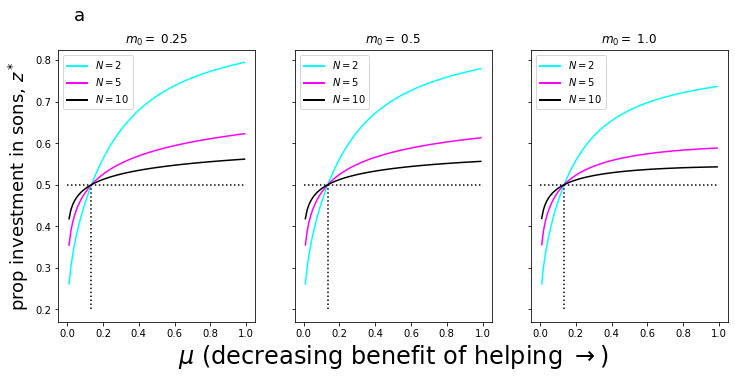

In [17]:
# Inclusive-fitness effect 

# solve eq 11 in Wild 2006 using an iterative numerical procedure
def ILH(m0, N, matCtrl=True, r=1/2, mu=1, step=1e-01, tol=1e-06, maxiter=1000):
    z=0.5
    s = 1 - m0*mu**(1-z)
    if matCtrl:
        rbar = rbarff(s,N)
    else:
        rbar = rbarfm(s,N)
    lhs = 1
    niter = 0
    while np.abs(lhs) > tol:
        # lhs of eq 11
        lhs = r * ( 1/z - 1/(1-z) ) + rbar*( 1/(1-z) + np.log(mu) )
        z += step * lhs
        s = 1 - m0*mu**(1-z)
        if matCtrl:
            rbar = rbarff(s,N)
        else:
            rbar = rbarfm(s,N)
        niter += 1
        if niter > maxiter:
            break
    if niter > maxiter:
        return np.nan
    else:
        return z

# re-create Fig 4 in Wild 2006
nobs = 100
m0vals = [0.25,0.5,1.0]
Nvals = [2,5,10]
muvals = np.linspace(0.01,0.99,nobs)
series = np.array([])

for m0 in m0vals:
    for N in Nvals:
        for mu in muvals:
            z = ILH(m0=m0, mu=mu, N=N)
            series = np.append(series, z)
            
series = np.reshape(series,(3,3,nobs))

fig2a, ax = plt.subplots( nrows = 1, ncols=3, sharey=True, figsize=(12,5))

color = ['cyan', 'magenta', 'black']

for j in range(3):
    for k in range(3):
        ax[j].plot( muvals, series[j,k], '-', color=color[k])
    ax[j].plot([0,1],[0.5,0.5], ':k')
    ax[j].plot([np.exp(-2), np.exp(-2)], [0.2,0.5], ':k')
    ax[j].set_title('$m_0 =$ {}'.format(m0vals[j]) )

ax[0].set_ylabel(r'prop investment in sons, $z^*$',fontsize=18)
ax[1].set_xlabel(r'$\mu$ (decreasing benefit of helping $\rightarrow$)',fontsize=24)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=color[0], lw=2),
                Line2D([0], [0], color=color[1], lw=2),
                Line2D([0], [0], color=color[2], lw=2)]

for j in range(3):
    ax[j].legend(custom_lines, [r'$N=2$', r'$N=5$', r'$N=10$'])

plt.suptitle("a", x=0.15, y=1.0, fontsize=18)
plt.show()

# Figure 2b

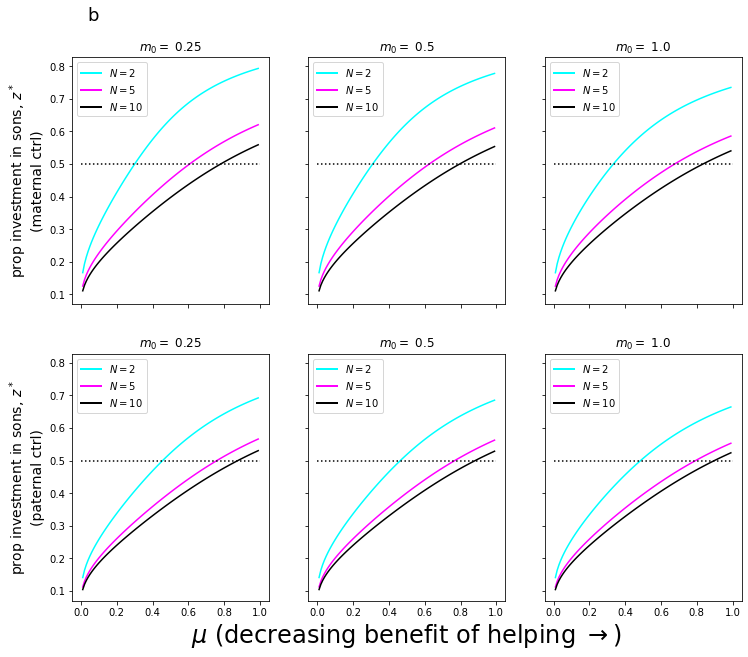

In [18]:
# Inclusive-fitness effect

# solve eq 12 in Wild 2006 using an iterative numerical procedure
def DLH(m0, N, matCtrl=True, r=1/2, mu=1, step=1e-01, tol=1e-06, maxiter=1000):
    z=0.5
    s = 1 - m0*mu**(1-z)
    if matCtrl:
        rbar = rbarff(s,N)
    else:
        rbar = rbarfm(s,N)
    lhs = 1
    niter = 0
    while np.abs(lhs) > tol:
        # lhs of eq 11
        lhs =  r * ( 1/z - 1/(1-z) ) + rbar*(1/(1-z) - np.log(mu)) +np.log(mu)
        z += step * lhs
        s = 1 - m0*mu**(1-z)
        if matCtrl:
            rbar = rbarff(s,N)
        else:
            rbar = rbarfm(s,N)
        niter += 1
        if niter > maxiter:
            break
    if niter > maxiter:
        return np.nan
    else:
        return z

# re-create Fig 5 in Wild 2006
nobs = 100
m0vals = [0.25,0.5,1.0]
Nvals = [2,5,10]
muvals = np.linspace(0.01,0.99,nobs)

# maternal ctrl
series1 = np.array([])

for m0 in m0vals:
    for N in Nvals:
        for mu in muvals:
            # changed step from default to better resolve small mu
            z = DLH(m0=m0, mu=mu, N=N, step=1e-02, maxiter=1e04)
            series1 = np.append(series1, z)
            
series1 = np.reshape(series1,(3,3,nobs))

# paternal ctrl
series2 = np.array([])

for m0 in m0vals:
    for N in Nvals:
        for mu in muvals:
            # changed step from default to better resolve small mu
            z = DLH(m0=m0, mu=mu, N=N, matCtrl=False, step=1e-02, maxiter=1e04)
            series2 = np.append(series2, z)
            
series2 = np.reshape(series2,(3,3,nobs))

fig2b, ax = plt.subplots( nrows = 2, ncols=3, sharex=True, sharey=True, figsize=(12,10))

color = ['cyan', 'magenta', 'black']

# maternal ctrl
for j in range(3):
    for k in range(3):
        ax[0,j].plot( muvals, series1[j,k], '-', color=color[k])
    ax[0,j].plot([0,1],[0.5,0.5], ':k')
    ax[0,j].set_title('$m_0 =$ {}'.format(m0vals[j]) )

# paternal ctrl
for j in range(3):
    for k in range(3):
        ax[1,j].plot( muvals, series2[j,k], '-', color=color[k])
    ax[1,j].plot([0,1],[0.5,0.5], ':k')
    ax[1,j].set_title('$m_0 =$ {}'.format(m0vals[j]) )

vlabel0 = r'prop investment in sons, $z^*$' + '\n' '(maternal ctrl)'
vlabel1 = r'prop investment in sons, $z^*$' + '\n' '(paternal ctrl)'

ax[0,0].set_ylabel(vlabel0,fontsize=14)
ax[1,0].set_ylabel(vlabel1,fontsize=14)

ax[1,1].set_xlabel(r'$\mu$ (decreasing benefit of helping $\rightarrow$)',fontsize=24)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=color[0], lw=2),
                Line2D([0], [0], color=color[1], lw=2),
                Line2D([0], [0], color=color[2], lw=2)]

for j in range(3):
    for i in range(2):
        ax[i,j].legend(custom_lines, [r'$N=2$', r'$N=5$', r'$N=10$'])

plt.suptitle("b", x=0.15, y=0.95, fontsize=18)
plt.show()

# Figure 3a

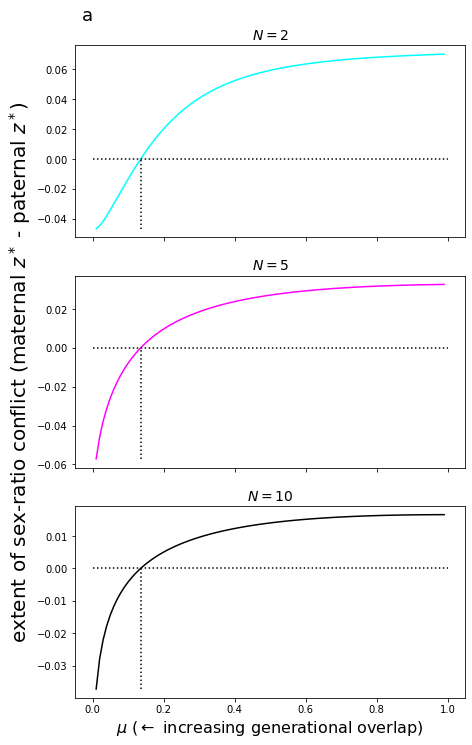

In [19]:
# Inclusive-fitness effect 

# solve eq 11 in Wild 2006 using an iterative numerical procedure
def ILH(m0, N, matCtrl=True, r=1/2, mu=1, step=1e-01, tol=1e-06, maxiter=1000):
    z=0.5
    s = 1 - m0*mu**(1-z)
    if matCtrl:
        rbar = rbarff(s,N)
    else:
        rbar = rbarfm(s,N)
    lhs = 1
    niter = 0
    while np.abs(lhs) > tol:
        # lhs of eq 11
        lhs = r * ( 1/z - 1/(1-z) ) + rbar*( 1/(1-z) + np.log(mu) )
        z += step * lhs
        s = 1 - m0*mu**(1-z)
        if matCtrl:
            rbar = rbarff(s,N)
        else:
            rbar = rbarfm(s,N)
        niter += 1
        if niter > maxiter:
            break
    if niter > maxiter:
        return np.nan
    else:
        return z

# re-create Fig 6 in Wild 2006
nobs = 100
Nvals = [2,5,10]
muvals = np.linspace(0.01,0.99,nobs)

# maternal ctrl
series1 = np.array([])

for N in Nvals:
    for mu in muvals:
        z = ILH(m0=1, mu=mu, N=N)
        series1 = np.append(series1, z)

series1 = np.reshape(series1,(3,nobs))

# paternal ctrl
series2 = np.array([])

for N in Nvals:
    for mu in muvals:
        z = ILH(m0=1, mu=mu, N=N, matCtrl=False)
        series2 = np.append(series2, z)
            
series2 = np.reshape(series2,(3,nobs))

fig3a, ax = plt.subplots( nrows = 3, ncols=1, sharex=True, figsize=(7,12))

color = ['cyan', 'magenta', 'black']
mytitle = [ r'$N=2$', r'$N=5$', r'$N=10$' ]

for j in range(3):
    ax[j].plot(muvals, series1[j]-series2[j], '-', color=color[j])
    ax[j].plot([0,1],[0,0], ':k')
    
    vmin = np.min( series1[j]-series2[j] )
    
    ax[j].plot([np.exp(-2), np.exp(-2)], [vmin,0], ':k')
    ax[j].set_title( mytitle[j], fontsize=14 )
    
ax[1].set_ylabel('extent of sex-ratio conflict (maternal $z^*$ - paternal $z^*$)', \
                 fontsize=20)
ax[2].set_xlabel(r'$\mu$ ($\leftarrow$ increasing generational overlap)',fontsize=16)

plt.suptitle("a", x=0.15, y=0.925, fontsize=18)
plt.show()

# Figure 3b

Set <code>corrected = True</code> in the cell below to recover the corrected figure and <code>corrected = False</code> to recover a version of the original figure.


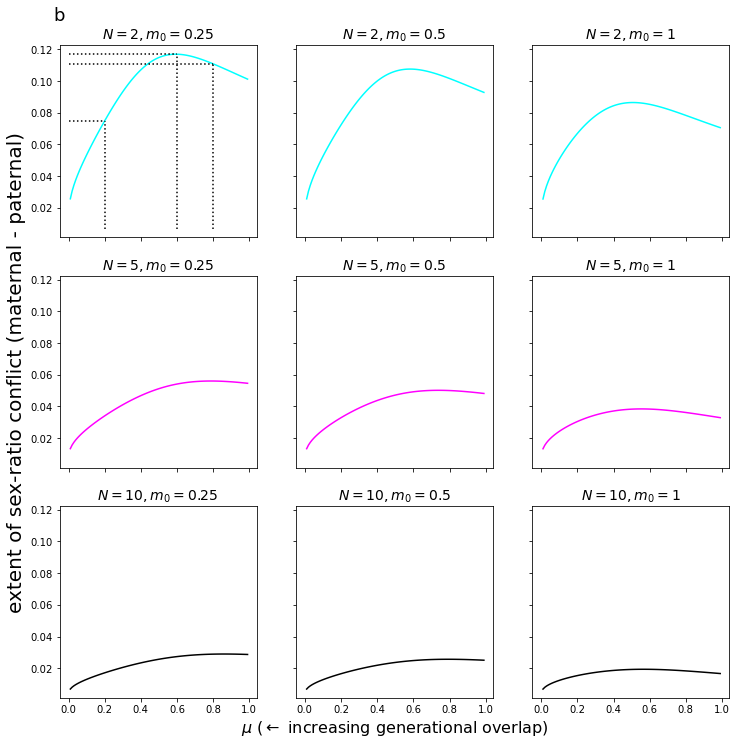

In [20]:
# Inclusive-fitness effect

# solve eq 12 in Wild 2006 with iterative numerical procedure 
def DLH(m0, N, matCtrl=True, r=1/2, mu=1, step=1e-01, tol=1e-06, maxiter=1000):
    z=0.5
    s = 1 - m0*mu**(1-z)
    if matCtrl:
        rbar = rbarff(s,N)
    else:
        rbar = rbarfm(s,N)
    lhs = 1
    niter = 0
    while np.abs(lhs) > tol:
        # lhs of eq 11
        lhs =  r * ( 1/z - 1/(1-z) ) + rbar*(1/(1-z) - np.log(mu)) +np.log(mu)
        z += step * lhs
        s = 1 - m0*mu**(1-z)
        if matCtrl:
            rbar = rbarff(s,N)
        else:
            rbar = rbarfm(s,N)
        niter += 1
        if niter > maxiter:
            break
    if niter > maxiter:
        return np.nan
    else:
        return z

# re-create Fig 7 in Wild 2006
nobs = 100
m0vals = [0.25,0.5,1.0]
Nvals = [2,5,10]
muvals = np.linspace(0.01,0.99,nobs)

# maternal ctrl
series1 = np.array([])

for N in Nvals:
    for m0 in m0vals:
        for mu in muvals:
            # changed step from default to better resolve small mu
            z = DLH(m0=m0, mu=mu, N=N, step=1e-02, maxiter=1e04)
            series1 = np.append(series1, z)
            
series1 = np.reshape(series1,(3,3,nobs))

# paternal ctrl
series2 = np.array([])

for N in Nvals:
    for m0 in m0vals:
        for mu in muvals:
            # changed step from default to better resolve small mu
            z = DLH(m0=m0, mu=mu, N=N, matCtrl=False, step=1e-02, maxiter=1e04)
            series2 = np.append(series2, z)
        
series2 = np.reshape(series2,(3,3,nobs))

color = ['cyan', 'magenta', 'black']

mytitle=np.array([ [r"$N=2, m_0=0.25$", r"$N=2, m_0=0.5$", r"$N=2, m_0=1$" ],\
                      [r"$N=5, m_0=0.25$", r"$N=5, m_0=0.5$", r"$N=5, m_0=1$" ],\
                      [r"$N=10, m_0=0.25$", r"$N=10, m_0=0.5$", r"$N=10, m_0=1$" ] ])

fig3b, ax = plt.subplots( nrows = 3, ncols=3, sharex=True, sharey=True, figsize=(12,12))

for i in range(3):
    for j in range(3):
        ax[i,j].plot( muvals, series1[i,j] - series2[i,j], '-', color=color[i])
        ax[i,j].set_title( mytitle[i,j], fontsize=14 )
        
ax[1,0].set_ylabel('extent of sex-ratio conflict (maternal - paternal)', \
                         fontsize=20)
ax[2,1].set_xlabel(r'$\mu$ ($\leftarrow$ increasing generational overlap)',fontsize=16)

#examples for top left panel

vmin = np.min(series1[0:3,0:3]-series2[0:3,0:3])

if corrected:
    muvals = [0.8, 0.6, 0.2]
else:
    muvals = [0.8, 0.3, 0.1]

for mu in muvals:
    zmat = DLH(m0=0.25, N=2, mu=mu)
    zpat = DLH(m0=0.25, N=2, mu=mu, matCtrl=False)
    ax[0,0].plot([mu,mu],[vmin, zmat-zpat], ':k' )
    ax[0,0].plot([0,mu],[zmat-zpat, zmat-zpat], ':k' )

plt.suptitle("b", x=0.125, y=0.925, fontsize=18)
plt.show()